In [1]:
exp_no = 0
gpu_id = 7

import torch
torch.cuda.set_device(gpu_id)

In [2]:
import os
import sys
import git
import pathlib

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

PROJ_ROOT_PATH = pathlib.Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
PROJ_ROOT =  str(PROJ_ROOT_PATH)
if PROJ_ROOT not in sys.path:
    sys.path.append(PROJ_ROOT)

print(f"Project Root Directory: {PROJ_ROOT}")

Project Root Directory: /repos/drl_csense


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import gymnasium as gym

In [5]:
from lib.folder_paths import get_logging_dir
from lib.env_utils import AtariWrapper_NoisyFrame, AtariWrapper_Compressed, make_atari_env_Custom_VecFrameStack

In [6]:
from lib.folder_paths import get_exp_name_tag, deconstruct_exp_name

In [7]:
env_id = "BreakoutNoFrameskip-v4"

# exp_param_type = "compress" 
exp_param_type = "noisy"

exp_param_value = 0.5

# Get names and tags of experiment
exp_name, exp_metaname, exp_tag = get_exp_name_tag(env_id, exp_param_type, exp_param_value)

In [8]:
# Get directories
models_dir, log_dir, gif_dir, image_dir = get_logging_dir(exp_name)

In [9]:
NUM_ENVS = 1
mother_seed = 2023

In [10]:
# Make vector environment
if exp_param_type == "compress":
    wrapper = AtariWrapper_Compressed
    wrapper_kwargs = {"compress_ratio":exp_param_value}
elif exp_param_type == "noisy":
    wrapper = AtariWrapper_NoisyFrame
    wrapper_kwargs = {"noise":exp_param_value}
else:
    wrapper = AtariWrapper
    wrapper_kwargs = None

env = make_atari_env_Custom_VecFrameStack(env_id,
                                        n_envs=NUM_ENVS,
                                        seed=mother_seed+exp_no,
                                        wrapper_class=wrapper,
                                        wrapper_kwargs = wrapper_kwargs
                                         )

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


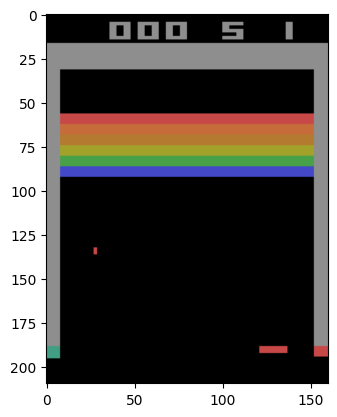

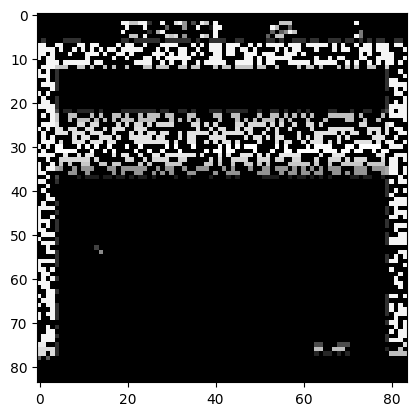

In [11]:
images = []
obss = []
obs = env.reset()
img = env.render(mode="rgb_array")
# for i in range(no_of_frames):
# images.append(img)
# obss.append(obs)
# # action, _ = model.predict(obs)
action = env.action_space.sample() 
obs, reward, done, info = env.step([action])
img = env.render(mode="rgb_array")

plt.figure(0)
plt.imshow(img)

plt.figure(1)
plt.imshow(obs[0,:,:,-1], cmap="gray")

In [ ]:
import datetime

In [29]:
now = datetime.datetime.now()

In [30]:
end = datetime.datetime.now()

In [31]:
end = datetime.datetime.now()
runtime = end - now
print(f"Experiment Finished. Runtime: {runtime)}")

AttributeError: 'datetime.timedelta' object has no attribute 'strftime'